In [5]:
import re
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ['id','category']
for i in range(1,301):
    names.append(str(i))


# Load text description vectors
descriptions = pd.read_csv('data/description_vecs.csv',names=names)
X = descriptions[descriptions.columns[2:302]]

# Reduce dimensionality with tSVD?
# X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X)
# No, dimensionality isn't the problem... it's sample size
# Reduce sample size:

X_reduced=pd.DataFrame()
for i in range(0,len(X)):
    if (i%100==0):
        X_reduced = pd.concat([X_reduced, X[i:i+1]])

X=X_reduced

In [11]:
# T-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, verbose=2, metric='cosine').fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1645
[t-SNE] Computed conditional probabilities for sample 1645 / 1645
[t-SNE] Mean sigma: 0.126361
[t-SNE] Iteration 25: error = 1.5184480, gradient norm = 0.0077541
[t-SNE] Iteration 50: error = 1.4321198, gradient norm = 0.0079492
[t-SNE] Iteration 75: error = 1.1481018, gradient norm = 0.0042661
[t-SNE] Iteration 100: error = 1.1142666, gradient norm = 0.0053868
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.114267
[t-SNE] Iteration 125: error = 1.0263976, gradient norm = 0.0019297
[t-SNE] Iteration 150: error = 1.0121512, gradient norm = 0.0040484
[t-SNE] Iteration 175: error = 1.0152129, gradient norm = 0.0046410
[t-SNE] Iteration 200: error = 1.0190164, gradient norm = 0.0047557
[t-SNE] Iteration 200: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 200 iterations: 1.114267


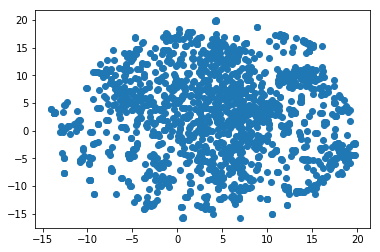

In [12]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1645
[t-SNE] Computed conditional probabilities for sample 1645 / 1645
[t-SNE] Mean sigma: 0.120998
[t-SNE] Iteration 25: error = 1.8373965, gradient norm = 0.0042399
[t-SNE] Iteration 50: error = 1.7148223, gradient norm = 0.0031543
[t-SNE] Iteration 75: error = 1.3986179, gradient norm = 0.0013038
[t-SNE] Iteration 100: error = 1.3465095, gradient norm = 0.0010930
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.346509
[t-SNE] Iteration 125: error = 1.2701620, gradient norm = 0.0008021
[t-SNE] Iteration 125: gradient norm 0.000802. Finished.
[t-SNE] Error after 125 iterations: 1.346509


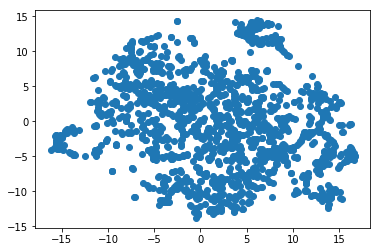

In [32]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=1)
X_tsvd = svd.fit_transform(X) 

X_embedded = TSNE(n_components=2, verbose=2).fit_transform(X_tsvd)

plt.scatter(X_embedded[:,0], X_embedded[:,1])